In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [314]:
df = pd.read_csv(r'E:/INTERN/INTERN SAVY/MALL CUSTOMER SEGMENTATION ANALYSIS/Mall_Customers.csv')

In [315]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [317]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [318]:
df.duplicated().sum()

0

In [319]:
X= df.iloc[:, [3,4]].values

In [320]:
wcss = []
for i in range(1,30):
    kmm = KMeans(n_clusters= i)
    kmm.fit_predict(X)
    wcss.append(kmm.inertia_)

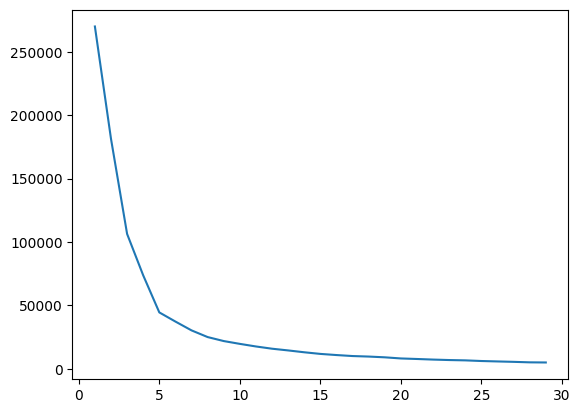

In [321]:
plt.plot(range(1,30), wcss)

In [322]:
kmc = KMeans(n_clusters= 6)
y_means = kmc.fit_predict(X)

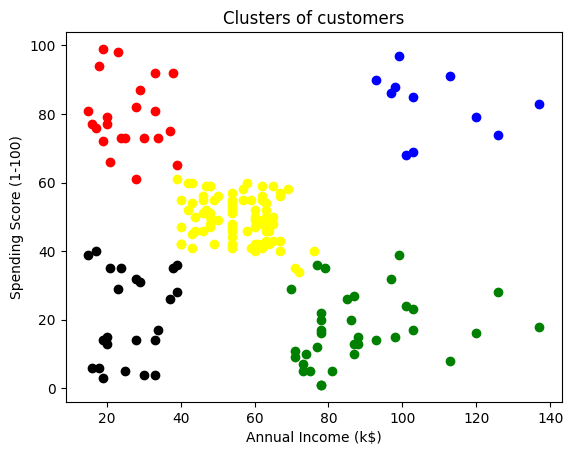

In [323]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],color='black')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [324]:
df['target'] = y_means

In [325]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [326]:
x = df.drop(columns="target")
y = df['target']

In [327]:
from sklearn.model_selection import train_test_split


In [328]:
la = LabelEncoder()
x['Gender'] = la.fit_transform(x['Gender'])

In [329]:
sc = StandardScaler()

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42)


In [331]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [332]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [333]:
lor = LogisticRegression()
gra = GradientBoostingClassifier(n_estimators=50, random_state=2)
knn = KNeighborsClassifier(n_neighbors=5)
svp = SVC(kernel='poly')
svpr = SVC(kernel='rbf')
dtc = DecisionTreeClassifier()


In [336]:
for i in range(10,36):
    x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=i)
    classifiers = [lor, gra, knn, svp, svpr, dtc]

    for classifier in classifiers:
   
        classifier.fit(x_train, y_train)
        
    
        y_pred = classifier.predict(x_test)
        
    
        accuracy = accuracy_score(y_test, y_pred)
        print(classifier,accuracy,i, end= "\n")
    print("-----------------------------------------------")


LogisticRegression() 0.925 10
GradientBoostingClassifier(n_estimators=50, random_state=2) 0.95 10
KNeighborsClassifier() 0.95 10
SVC(kernel='poly') 0.975 10
SVC() 0.95 10
DecisionTreeClassifier() 0.925 10
-----------------------------------------------
LogisticRegression() 0.95 11
GradientBoostingClassifier(n_estimators=50, random_state=2) 0.975 11
KNeighborsClassifier() 1.0 11
SVC(kernel='poly') 1.0 11
SVC() 1.0 11
DecisionTreeClassifier() 1.0 11
-----------------------------------------------
LogisticRegression() 0.825 12
GradientBoostingClassifier(n_estimators=50, random_state=2) 0.9 12
KNeighborsClassifier() 0.925 12
SVC(kernel='poly') 0.975 12
SVC() 0.9 12
DecisionTreeClassifier() 0.925 12
-----------------------------------------------
LogisticRegression() 0.975 13
GradientBoostingClassifier(n_estimators=50, random_state=2) 0.95 13
KNeighborsClassifier() 0.975 13
SVC(kernel='poly') 0.975 13
SVC() 0.925 13
DecisionTreeClassifier() 0.925 13
-----------------------------------------

In [337]:
classifiers = [lor, gra, knn, svp, svpr, dtc]

for classifier in classifiers:
    x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=33)
   
    classifier.fit(x_train, y_train)
    
  
    y_pred = classifier.predict(x_test)
    
   
    accuracy = accuracy_score(y_test, y_pred)
    print(classifier, accuracy)

LogisticRegression() 0.925
GradientBoostingClassifier(n_estimators=50, random_state=2) 1.0
KNeighborsClassifier() 1.0
SVC(kernel='poly') 1.0
SVC() 1.0
DecisionTreeClassifier() 1.0


In [345]:
pd.DataFrame({"original":y_test, "logistic":lor.predict(x_test), "gradient_boosting":gra.predict(x_test), "knn":knn.predict(x_test), "support vector_poly":svp.predict(x_test), "svm_rbf":svpr.predict(x_test),
"dt_class":dtc.predict(x_test)})

,original,logistic,gradient_boosting,knn,support vector_poly,svm_rbf,dt_class
15,1,1,1,1,1,1,1
171,5,5,5,5,5,5,5
103,3,3,3,3,3,3,3
119,3,3,3,3,3,3,3
116,3,3,3,3,3,3,3
162,2,2,2,2,2,2,2
54,3,3,3,3,3,3,3
17,1,1,1,1,1,1,1
117,3,3,3,3,3,3,3
100,3,3,3,3,3,3,3
